<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_10_ED01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Actividad 01, Decamiento radioactivo
1. Resolver la siguiente ecuacion diferencial, empleando el metodo de Euler. Deberá generar el código en markdown con la explicación del método y las deducciones.

\begin{equation}
\frac{\mathrm{d}N}{\mathrm{d}t}=-λ N
\end{equation}


# Actividad 02, Oscilador armónico
2. Resolver la siguiente ecuación difirencial, empleando el metodo de Euler. interprete su resultado.

\begin{equation}   
m \frac{d^2x}{dt^2}+kx + bv=0
\end{equation}


Para el oscilador aromónico anterior, escribir un programa con extension py que permita dar escribir la velocidad y la posicion
como funcion del tiempo.

La ejecucion del programa deberá ser de la siguiente forma:

python oscilador_armonico.py

al ejecutarse, el programa almacenará en memoría en el directorio data, la velocidad y la posición.

    data/velocidad.txt
    data/posicion.txt

Puede utlizar el siguiente código como guía:

```python
#!/usr/bin/env python3
def euler(x):
    
    return y, v

def save_file(path):
    return


if __name__=='__main__':
    y, v = euler(x)
    save_file(path)

```


##1 punto

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
lambda1=1
N0=1000

In [ ]:
f=lambda t,N:-lambda1*N

In [ ]:
Nvalores=1000
limsuperior=2
t=np.linspace(0,limsuperior,Nvalores)

In [ ]:
N_algo=np.zeros(len(t))

In [ ]:
deltat=limsuperior/Nvalores
N_algo[0]=N0
for i in range(1,len(t)):
  N_algo[i]=N_algo[i-1]+deltat*f(t[i],N_algo[i-1])

In [ ]:
N=lambda t:N0*np.exp(-lambda1*t)

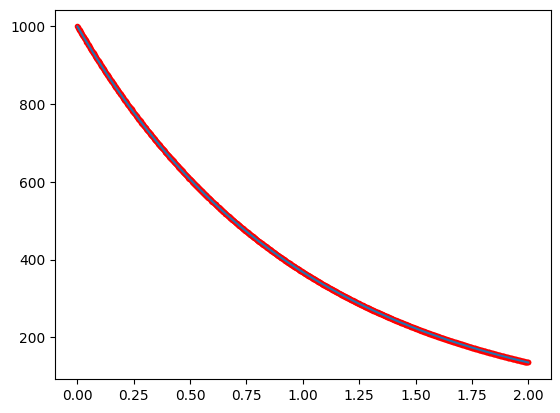

In [ ]:
plt.plot(t,N_algo,"r.")
plt.plot(t,N(t))

##2 Punto

In [ ]:
gamma=0
omega=2
params = (gamma,omega)
def fun (t, y,params):
  gamma = params[0]
  omega = params[1]
  dydt = y[1]
  dvdt = -gamma*y[1]-omega*y[0]
  return np.array([dydt,dvdt])


In [ ]:
t=np.linspace(0,500,100000)

In [ ]:
def euler(t,y0,v0):
  deltat=t[1]-t[0]
  y_ci=np.array([y0,v0])
  y=np.zeros(len(t))
  v=np.zeros(len(t))
  y[0]=y_ci[0]
  v[0]=y_ci[1]
  for i in range(1,len(t)):
    y[i]=y[i-1]+deltat*fun(t,y_ci,params)[0]
    v[i]=v[i-1]+deltat*fun(t,y_ci,params)[1]
    y_ci=np.array([y[i],v[i]])
  return y,v

In [ ]:
plt.plot(t,euler(t,1,1E-12)[0])

##3) Runge Kutta punto 1


In [ ]:
lambda1=1
N0=1000

In [ ]:
f=lambda t,N:-lambda1*N

In [ ]:
Nvalores=1000
limsuperior=2
t=np.linspace(0,limsuperior,Nvalores)
deltat=limsuperior/Nvalores

In [ ]:
Prueba_algo=np.zeros(len(t))

In [ ]:
Prueba_algo[0]=1000
h=deltat
for i in range(1,len(t)):
  k1=f(t[i-1],Prueba_algo[i-1])
  k2=f(t[i-1]+h/2,Prueba_algo[i-1]+h/2*k1)
  k3=f(t[i-1]+h/2,Prueba_algo[i-1]+h/2*k2)
  k4=f(t[i-1]+h,Prueba_algo[i-1]+h*k3)
  Prueba_algo[i]=Prueba_algo[i-1]+h/6*(k1+2*k2+2*k3+k4)

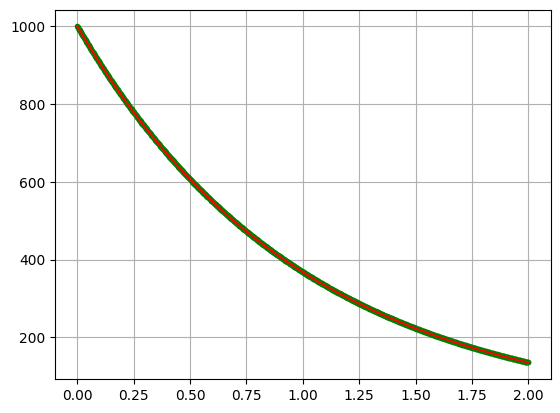

In [ ]:
plt.plot(t,Prueba_algo,"g.")
plt.plot(t,N(t),"r")
plt.grid()

##4) Runge kutta punto 2


In [ ]:
gamma=0
omega=1
dydt=lambda t,a:a[1]
dvdt=lambda t,a:-gamma*a[1]-omega*a[0]

In [ ]:
def rungekuttaOscilador(t,y0,v0,gamma,omega):
  h=t[1]-t[0]
  y=np.zeros(len(t))
  v=np.zeros(len(t))
  aparam=[y0,v0]
  for i in range(1,len(t)):
    k11=dydt(t[i-1],aparam)
    k12=dydt(t[i-1]+h/2,aparam+h/2*k11)
    k13=dydt(t[i-1]+h/2,aparam+h/2*k12)
    k14=dydt(t[i-1]+h,aparam+h*k3)
    k21=dvdt(t[i-1],aparam)
    k22=dvdt(t[i-1]+h/2,aparam+h/2*k21)
    k23=dvdt(t[i-1]+h/2,aparam+h/2*k22)
    k24=dvdt(t[i-1]+h,aparam+h*k23)
    y[i]=y[i-1]+h/6*(k11+2*k12+2*k13+k14)
    v[i]=v[i-1]+h/6*(k21+2*k22+2*k23+k24)
    aparam=[y[i],v[i]]
  return y,v

In [ ]:
t=np.linspace(0,10,100000)

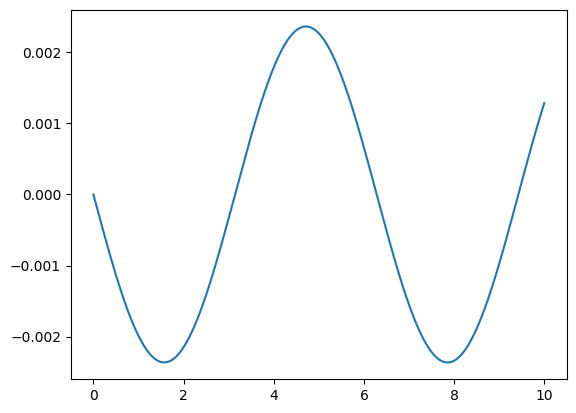

In [ ]:
plt.plot(t,rungekuttaOscilador(t,1,1E-5,gamma,omega)[0])